# Import Library

Proses NLP :
- EDA
- Pembersihan (Hapus tanda baca, ubah ke lowercase)
- Tokenisasi
- Penghapusan stopwords
- Stemming atau Lemmatization
- Vektorisasi teks (misalnya, TF-IDF, BoW)
- Pembagian data (Training, Validation, Test)
- Pembangunan dan pelatihan model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv("./Data/all_data_resep.csv")
df.head()

,Title,Ingredients,Steps,Loves,URL
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam


In [3]:
# Duplicated Check
print("Duplicated : ", df.duplicated().sum())
print("\nMissing Values:")
df.isna().sum()

Duplicated :  642

Missing Values:


Title          0
Ingredients    0
Steps          0
Loves          0
URL            0
dtype: int64

In [4]:
# Drop Column URL
df = df.drop(columns=['URL'])

In [5]:
# Statistic descriptive for data numeric
print("\nStatistik Deskriptif:")
print(df.describe())

# Statistic descriptive for data text
print("\nStatistic Data Text:")
print(df[['Title', 'Ingredients', 'Steps']].describe(include=[object]))



Statistik Deskriptif:
              Loves
count  15593.000000
mean      11.779901
std       21.549629
min        0.000000
25%        3.000000
50%        6.000000
75%       11.000000
max      939.000000

Statistic Data Text:
                   Title                                        Ingredients  \
count              15593                                              15593   
unique             12468                                              14940   
top     Tongseng Kambing  1 papan tempe, potong kubus--5 buah tahu putih...   
freq                  55                                                  3   

                                                    Steps  
count                                               15593  
unique                                              14940  
top     Tumis bumbu halus, masukan salam, jahe, dan le...  
freq                                                    3  


In [6]:
duplicates = df[df.duplicated()]
duplicates

,Title,Ingredients,Steps,Loves
5324,Ayam goreng super duper simple,"Ayam, bisa diganti ati ampela/daging kambing--...",Cuci bersih ayam--Rebus ayam dengan asem dan g...,7
5326,Gulai ayam arya,Bahan halus;--5 ekor Ayam--5 bulat Bawang puti...,Bersihkan ayam potong sesuai selera. Setelah a...,9
5329,Gurame Bakar,1 ekor gurame (sy pakai berat 700 gr)--Bumbu h...,"Cuci bersih ikan, lalu belah punggung,dan saya...",12
5802,Pare ayam daging sapi,2 buah pare ayam--200 gr daging sapi (potong d...,"Potong agak tebal pare lalu taburi garam,remas...",3
5875,Iga sapi & ayam bakar madu,1/2 kg iga sapi--1/2 ayam (bagian paha potong ...,Cuci bersih iga & ayam--Rebus daging sapi meng...,8
...,...,...,...,...
15077,Telur balado kentang + udang,1/4 telur (rebus)--1/4 kentang (pot kotak gore...,"Rebus telur hingga matang,, kentang kupas (gor...",6
15105,Sambal lado telur puyu terong udang,10 btih telur puyu--semper empat udang--1 buah...,Rebus telur puyuh kups sisikn--Berdikn udang d...,11
15186,Rolade Telur Udang Saus Asam Manis,2 butir telur--1/2 batang wortel--2-3 batang d...,"Campur telur, daun bawang, serta wortel yg sud...",5
15203,Udang bungkus telur,1/4 udang--5 butir telur--1/6 kol--daun bawang...,Dadar telur secukupnya untuk bungkus--Oseng ba...,13


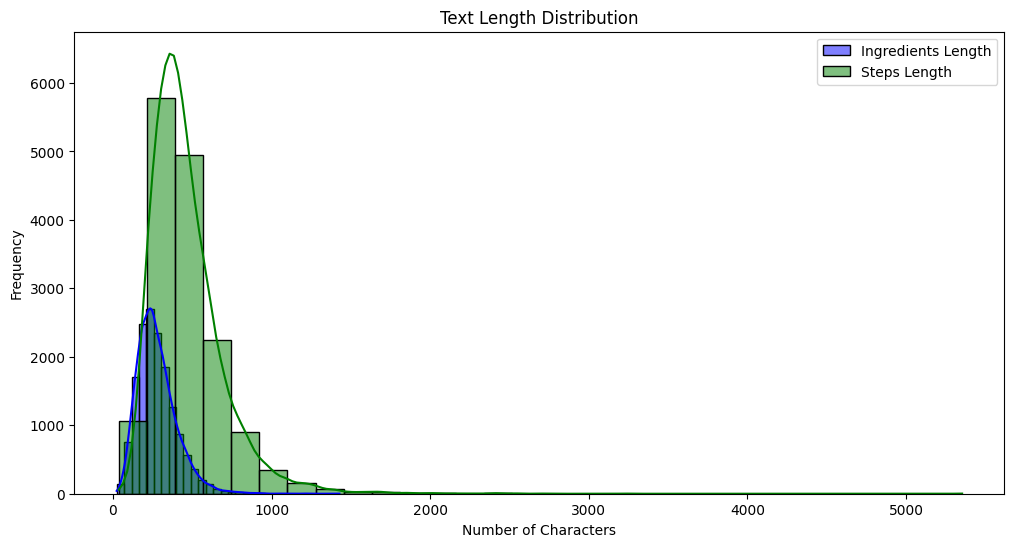

In [7]:
# Distribution of text length in the Ingredients column
df['Ingredients_length'] = df['Ingredients'].apply(lambda x: len(str(x)))
df['Steps_length'] = df['Steps'].apply(lambda x: len(str(x)))

# Visualization of text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Ingredients_length'], kde=True, bins=30, color='blue', label='Ingredients Length')
sns.histplot(df['Steps_length'], kde=True, bins=30, color='green', label='Steps Length')
plt.title('Text Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [8]:
# Analysis of the distribution of 'Loves' values
print("\nDistribution Loves Value:")
print(df['Loves'].value_counts())


Distribution Loves Value:
Loves
6      1513
5      1319
3      1317
4      1304
7      1211
       ... 
171       1
145       1
195       1
99        1
109       1
Name: count, Length: 185, dtype: int64


# Preprocessing Data

In [9]:
# import re
# import string
# import nltk

Changce Column Title, Ingredients and Steps to lower text

In [86]:
# def clean_emoji(text):
#   if text is not None and isinstance(text, str):
#     emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"
#         u"\U0001F300-\U0001F5FF"
#         u"\U0001F680-\U0001F6FF"
#         u"\U0001F700-\U0001F77F"
#         u"\U0001F780-\U0001F7FF"
#         u"\U0001F800-\U0001F8FF"
#         u"\U0001F900-\U0001F9FF"
#         u"\U0001FA00-\U0001FA6F"
#         u"\U0001FA70-\U0001FAFF"
#         u"\U00002702-\U000027B0"
#         u"\U000024C2-\U0001F251"
#         "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)

# for col in ['Ingredients', 'Title', 'Steps']:
#     df[col] = df[col].fillna('').apply(clean_emoji)
# df.head(1)

,Title,Ingredients,Steps,Loves,Ingredients_length,Steps_length,combine_text,Combined_Text,Cleaned_Text
0,None,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,271,1127,Ayam Woku Manado 1 Ekor Ayam Kampung (potong 1...,Ayam Woku Manado 1 Ekor Ayam Kampung (potong 1...,ayam woku manado ekor ayam kampung potong buah...


In [87]:
# # Merge Title, Ingredients, and Steps columns into 1
# df["Combined_Text"] = (
#     df["Title"].fillna('') + ' ' +
#     df["Ingredients"].fillna('') + ' ' +
#     df["Steps"].fillna('')
# )

In [19]:
# from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
# nltk.download('stopwords')
# # Bersihkan teks: huruf kecil, hapus karakter khusus, dan hapus spasi
# def clean_text(text):
#     # Konversi ke huruf kecil
#     text = text.lower()
    
#     # Menghapus tanda baca dan karakter non-huruf
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
    
#     # Tokenisasi (memisah kata-kata)
#     words = text.split()
    
#     # Stemming atau Lemmatization
#     lemmatizer = WordNetLemmatizer()
#     words = [lemmatizer.lemmatize(word) for word in words]
    
#     return ' '.join(words)

# df['Cleaned_Text'] = df['Combined_Text'].apply(clean_text)

# # Menampilkan dataset yang telah dibersihkan dengan kolom baru
# df[['Title', 'Combined_Text', 'Cleaned_Text']].head()

[nltk_data] Downloading package wordnet to C:\Users\Santi
[nltk_data]     Susanti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Santi
[nltk_data]     Susanti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Title,Combined_Text,Cleaned_Text
0,Ayam Woku Manado,Ayam Woku Manado 1 Ekor Ayam Kampung (potong 1...,ayam woku manado ekor ayam kampung potong buah...
1,Ayam goreng tulang lunak,Ayam goreng tulang lunak 1 kg ayam (dipotong s...,ayam goreng tulang lunak kg ayam dipotong sesu...
2,Ayam cabai kawin,Ayam cabai kawin 1/4 kg ayam--3 buah cabai hij...,ayam cabai kawin kg ayam buah cabai hijau besa...
3,Ayam Geprek,Ayam Geprek 250 gr daging ayam (saya pakai fil...,ayam geprek gr daging ayam saya pakai filletse...
4,Minyak Ayam,Minyak Ayam 400 gr kulit ayam & lemaknya--8 si...,minyak ayam gr kulit ayam lemaknya siung bawan...


Tokenization and Padding

In [17]:
# !pip install Sastrawi

In [20]:
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# from sklearn.feature_extraction.text import TfidfVectorizer

# factory = StopWordRemoverFactory()
# stopword_remover = factory.create_stop_word_remover()
# df['Cleaned_Text'] = df['Cleaned_Text'].apply(stopword_remover.remove)

# # Access the internal stop words list (this might be implementation-specific)
# sastrawi_stop_words = factory.get_stop_words() 

# tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words=sastrawi_stop_words) 

# # Fit and transform the cleaned text
# tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])

# # Convert the TF-IDF matrix to a DataFrame for better readability
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Display the first few rows of the TF-IDF representation
# tfidf_df.head()

,adonan,aduk,adukaduk,air,airbumbu,airnya,airsecukupnya,aja,aku,ala,...,utk,utuh,wadah,wajan,wangi,warna,wijen,wortel,yaa,yg
0,0.0,0.035814,0.0,0.056092,0.0,0.0,0.000000,0.159673,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.071526,0.0,0.0,0.204422,0.000000
1,0.0,0.000000,0.0,0.061460,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.044903
2,0.0,0.000000,0.0,0.047729,0.0,0.0,0.134085,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.225341,0.128665,0.000000,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.0,0.050728,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.108066,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.116094


In [89]:
# VOCAB_SIZE = 10000
# PADDING_TYPE = 'post'
# EMBEDDING_DIM = 16
# MAX_LENGTH = 500

In [90]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.layers import Embedding

# # Tokenizer
# tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
# tokenizer.fit_on_texts(df['Cleaned_Text'])

# # Convert text to a sequence of numbers using padding
# sequence = tokenizer.texts_to_sequences(df['Cleaned_Text'])
# padded_sequence = tf.keras.utils.pad_sequences(sequence, maxlen=MAX_LENGTH, padding=PADDING_TYPE)

# # Embedding
# embedding = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM)
# embedded_vector = embedding(padded_sequence)

In [91]:
# print(df['Cleaned_Text'].head())

0    ayam woku manado ekor ayam kampung potong buah...
1    ayam goreng tulang lunak kg ayam dipotong sesu...
2    ayam cabai kawin kg ayam buah cabai hijau besa...
3    ayam geprek gr daging ayam pakai filletsecukup...
4    minyak ayam gr kulit ayam lemaknya siung bawan...
Name: Cleaned_Text, dtype: object


In [92]:
# print("Tokenized Sequences:")
# for i, seq in enumerate(sequence[:2]): 
#     print(f"Sample {i+1}: {seq}")


Tokenized Sequences:
Sample 1: [18, 1866, 5089, 177, 18, 635, 23, 8, 38, 123, 14, 11, 55, 90, 2, 3, 2, 4, 12, 3, 12, 37, 3, 45, 50, 42, 97, 74, 127, 58, 6, 51, 271, 6, 1, 39, 222, 5, 68, 83, 18, 192, 13, 759, 38, 123, 247, 362, 38, 123, 166, 528, 67, 11, 21, 10, 260, 135, 143, 94, 159, 18, 362, 367, 6718, 18, 650, 121, 35, 13, 850, 7, 234, 231, 2, 3, 2, 4, 12, 3, 12, 37, 97, 90, 2949, 369, 22, 41, 497, 159, 231, 127, 118, 96, 242, 332, 224, 1, 7, 102, 3307, 32, 116, 210, 127, 6, 6719, 1339, 32, 32, 181, 191, 36, 18, 75, 15, 121, 35, 108, 7, 75, 32, 135, 94, 270, 159, 7, 133, 13, 483, 222, 5, 13, 34, 71, 39, 24, 45, 50, 107, 39, 159, 219, 779, 546, 87, 13, 36, 6, 212, 75, 23, 23, 49, 1867, 94, 1011, 1, 156, 412, 18, 1866, 1, 10757, 247, 312, 92, 34, 178, 40, 3, 403, 1957, 45, 50, 242, 497, 1]
Sample 2: [18, 15, 246, 560, 82, 18, 189, 45, 50, 116, 56, 74, 120, 353, 58, 6, 38, 42, 2, 4, 102, 14, 99, 102, 55, 168, 298, 102, 55, 168, 90, 102, 42, 97, 1171, 105, 5, 2362, 2591, 561, 22, 15, 1

In [93]:
# print("\nPadded Sequences:")
# for i, seq in enumerate(padded_sequence[:2]):  
#     print(f"Sample {i+1}: {seq}")



Padded Sequences:
Sample 1: [   18  1866  5089   177    18   635    23     8    38   123    14    11
    55    90     2     3     2     4    12     3    12    37     3    45
    50    42    97    74   127    58     6    51   271     6     1    39
   222     5    68    83    18   192    13   759    38   123   247   362
    38   123   166   528    67    11    21    10   260   135   143    94
   159    18   362   367  6718    18   650   121    35    13   850     7
   234   231     2     3     2     4    12     3    12    37    97    90
  2949   369    22    41   497   159   231   127   118    96   242   332
   224     1     7   102  3307    32   116   210   127     6  6719  1339
    32    32   181   191    36    18    75    15   121    35   108     7
    75    32   135    94   270   159     7   133    13   483   222     5
    13    34    71    39    24    45    50   107    39   159   219   779
   546    87    13    36     6   212    75    23    23    49  1867    94
  1011     1   156   4

In [94]:
# print("\nEmbedded Vectors:")
# for i in range(2):  
#     print(f"Sample {i+1}:")
#     print(embedded_vector[i].numpy())  



Embedded Vectors:
Sample 1:
[[-0.01616306 -0.03993429  0.01229359 ... -0.03448034  0.02706996
  -0.01806061]
 [ 0.01566619 -0.01693641  0.02426196 ...  0.00908266 -0.00722082
  -0.04980585]
 [ 0.00398676  0.01218498  0.02174259 ...  0.01176051 -0.01890273
  -0.040957  ]
 ...
 [-0.00214047 -0.04616908 -0.02825512 ...  0.00414996  0.01676795
   0.01059289]
 [-0.00214047 -0.04616908 -0.02825512 ...  0.00414996  0.01676795
   0.01059289]
 [-0.00214047 -0.04616908 -0.02825512 ...  0.00414996  0.01676795
   0.01059289]]
Sample 2:
[[-0.01616306 -0.03993429  0.01229359 ... -0.03448034  0.02706996
  -0.01806061]
 [-0.00917219 -0.01988534 -0.01968758 ...  0.0038636   0.00906172
   0.03541472]
 [-0.02778639 -0.01079283 -0.01092653 ...  0.02534932 -0.03322385
  -0.02034642]
 ...
 [-0.00214047 -0.04616908 -0.02825512 ...  0.00414996  0.01676795
   0.01059289]
 [-0.00214047 -0.04616908 -0.02825512 ...  0.00414996  0.01676795
   0.01059289]
 [-0.00214047 -0.04616908 -0.02825512 ...  0.00414996  0.01

# Train and Validation 

In [100]:
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# import numpy as np

# labels = np.random.randint(0, 2, size=(padded_sequence.shape[0],))
# # # Encode target using LabelEncoder
# # label_encoder = LabelEncoder()
# # df['Title'] = label_encoder.fit_transform(df['Title'])

# # # One-hot encoding for target
# # num_classes = df['Title'].max() + 1
# # Y = to_categorical(df['Title'], num_classes=num_classes)

# # Split data into training and validation
# # X_train, X_val, Y_train, Y_val = train_test_split(
# #     padded_sequence, Y, test_size=0.2, random_state=42
# # )
# X_train, X_val, y_train, y_val = train_test_split(padded_sequence, labels, test_size=0.2, random_state=42)

# # print("Jumlah kelas:", num_classes)
# print("Jumlah data training:", len(X_train))
# print("Jumlah data validation:", len(X_val))

Jumlah data training: 12474
Jumlah data validation: 3119


# Create a Model

In [103]:
# from tensorflow.keras import layers, models

# # Tentukan bentuk input berdasarkan fitur TF-IDF
# input_shape = tfidf_matrix.shape[1]

# # Membangun model
# model = models.Sequential([
#     # layers.InputLayer(input_shape=(input_shape,)),
#     # layers.Dense(64, activation='relu'),  
#     # layers.Dropout(0.3),  
#     # layers.Dense(32, activation='relu'),
#     # layers.Dropout(0.3),
#     # layers.Dense(1, activation='sigmoid') 
#     layers.InputLayer(input_shape=(MAX_LENGTH,)),  # Input layer eksplisit
#     layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH),
#     layers.GlobalAveragePooling1D(),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(32, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(1, activation='sigmoid')
# # ])
# ])

# # Compile model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 500, 16)        │       199,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,785 (792.13 KB)

 Trainable params: 202,785 (792.13 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# class StopTrainingCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         # Check accuracy value
#         accuracy = logs.get('accuracy')
#         if accuracy is not None and accuracy >= 0.85:
#             print(f"\nAkurasi telah mencapai {accuracy * 100:.2f}%. Pelatihan dihentikan pada epoch {epoch + 1}.")
#             self.model.stop_training = True


In [104]:
# print("Shape X_train:", X_train.shape)
# print("Shape y_train:", y_train.shape)

Shape X_train: (12474, 500)
Shape y_train: (12474,)


In [105]:
# # Training model
# stop_training_callback = StopTrainingCallback()

# history = model.fit(
#     X_train, Y_train,
#     validation_data=(X_val, Y_val),
#     epochs=10,
#     batch_size=32,
#     callbacks=[stop_training_callback]  
# )

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 12442), output.shape=(None, 1)

In [ ]:
# # Test the model with a query
# def search_recipes_cnn(query):
#     query_cleaned = re.sub(r'[^\w\s]', '', query.lower())
#     query_cleaned = " ".join([word for word in word_tokenize(query_cleaned) if word not in stop_words])
#     query_sequence = tokenizer.texts_to_sequences([query_cleaned])
#     query_padded = pad_sequences(query_sequence, maxlen=MAX_LENGTH, padding=PADDING_TYPE)
#     prediction = model.predict(query_padded)
#     top_indices = prediction[0].argsort()[-5:][::-1]  
#     top_recipes = df[df['label'].isin(top_indices)]
#     return top_recipes[['Title', 'Ingredients', 'Steps']]

# # Example query
# query = "ayam goreng"
# results = search_recipes_cnn(query)
# print("Top Recipes for Query:", query)
# print(results)

In [ ]:
# # Plot the result
# def plot_graph(history, string):
#     plt.plot(history.history['accuracy'], label='Train Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.show()


# plot_graph(history, "accuracy")
# plot_graph(history, "loss")

# RONDE KEDUA

In [3]:
import pandas as pd

# Load dataset to understand its structure
file_path = './Data/all_data_resep.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset and its structure
dataset.head(), dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15593 entries, 0 to 15592
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        15593 non-null  object
 1   Ingredients  15593 non-null  object
 2   Steps        15593 non-null  object
 3   Loves        15593 non-null  int64 
 4   URL          15593 non-null  object
dtypes: int64(1), object(4)
memory usage: 609.2+ KB


(                      Title  \
 0          Ayam Woku Manado   
 1  Ayam goreng tulang lunak   
 2          Ayam cabai kawin   
 3               Ayam Geprek   
 4               Minyak Ayam   
 
                                          Ingredients  \
 0  1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...   
 1  1 kg ayam (dipotong sesuai selera jangan kecil...   
 2  1/4 kg ayam--3 buah cabai hijau besar--7 buah ...   
 3  250 gr daging ayam (saya pakai fillet)--Secuku...   
 4  400 gr kulit ayam & lemaknya--8 siung bawang p...   
 
                                                Steps  Loves  \
 0  Cuci bersih ayam dan tiriskan. Lalu peras jeru...      1   
 1  Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...      1   
 2  Panaskan minyak di dalam wajan. Setelah minyak...      2   
 3  Goreng ayam seperti ayam krispi--Ulek semua ba...     10   
 4  Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...      4   
 
                                           URL  
 0          /id/resep/44730

In [4]:
import string

# Step 1: Remove duplicates and check for missing values
dataset_cleaned = dataset.drop_duplicates().dropna()

# Function to clean text by removing punctuation and converting to lowercase
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply text cleaning to relevant columns
columns_to_clean = ['Title', 'Ingredients', 'Steps']
for column in columns_to_clean:
    dataset_cleaned[column] = dataset_cleaned[column].apply(clean_text)

# Check cleaned data
dataset_cleaned.info(), dataset_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 14951 entries, 0 to 15592
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        14951 non-null  object
 1   Ingredients  14951 non-null  object
 2   Steps        14951 non-null  object
 3   Loves        14951 non-null  int64 
 4   URL          14951 non-null  object
dtypes: int64(1), object(4)
memory usage: 700.8+ KB


(None,
                       Title  \
 0          ayam woku manado   
 1  ayam goreng tulang lunak   
 2          ayam cabai kawin   
 3               ayam geprek   
 4               minyak ayam   
 
                                          Ingredients  \
 0  1 ekor ayam kampung potong 122 buah jeruk nipi...   
 1  1 kg ayam dipotong sesuai selera jangan kecil2...   
 2  14 kg ayam3 buah cabai hijau besar7 buah cabai...   
 3  250 gr daging ayam saya pakai filletsecukupnya...   
 4  400 gr kulit ayam  lemaknya8 siung bawang puti...   
 
                                                Steps  Loves  \
 0  cuci bersih ayam dan tiriskan lalu peras jeruk...      1   
 1  haluskan bumbu2nya baput ketumbar kemiri kunyi...      1   
 2  panaskan minyak di dalam wajan setelah minyak ...      2   
 3  goreng ayam seperti ayam krispiulek semua baha...     10   
 4  cuci bersih kulit ayam sisihkanambil 50 ml min...      4   
 
                                           URL  
 0          /id/rese

In [5]:
# Step 2: Combine text from Title, Ingredients, and Steps into a single 'Recipe Description' column
dataset_cleaned['Recipe Description'] = dataset_cleaned['Title'] + ' ' + dataset_cleaned['Ingredients'] + ' ' + dataset_cleaned['Steps']

# Check the updated dataset with the new column
dataset_cleaned[['Title', 'Ingredients', 'Steps', 'Recipe Description']].head()


,Title,Ingredients,Steps,Recipe Description
0,ayam woku manado,1 ekor ayam kampung potong 122 buah jeruk nipi...,cuci bersih ayam dan tiriskan lalu peras jeruk...,ayam woku manado 1 ekor ayam kampung potong 12...
1,ayam goreng tulang lunak,1 kg ayam dipotong sesuai selera jangan kecil2...,haluskan bumbu2nya baput ketumbar kemiri kunyi...,ayam goreng tulang lunak 1 kg ayam dipotong se...
2,ayam cabai kawin,14 kg ayam3 buah cabai hijau besar7 buah cabai...,panaskan minyak di dalam wajan setelah minyak ...,ayam cabai kawin 14 kg ayam3 buah cabai hijau ...
3,ayam geprek,250 gr daging ayam saya pakai filletsecukupnya...,goreng ayam seperti ayam krispiulek semua baha...,ayam geprek 250 gr daging ayam saya pakai fill...
4,minyak ayam,400 gr kulit ayam lemaknya8 siung bawang puti...,cuci bersih kulit ayam sisihkanambil 50 ml min...,minyak ayam 400 gr kulit ayam lemaknya8 siung...


In [6]:
# Step 3: Shuffle data to ensure randomness before training
dataset_shuffled = dataset_cleaned.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the first few rows after shuffling
dataset_shuffled.head()


,Title,Ingredients,Steps,Loves,URL,Recipe Description
0,tahu lada garam,bahan4 kotak tahu kuning ukuran 4x4 cm15 sdt g...,potong dadu tahu ukuran 15x15 cm rebus tahu de...,1,/id/resep/4038600-tahu-lada-garam,tahu lada garam bahan4 kotak tahu kuning ukura...
1,tahu gejrot,tahu pong2 siung bawang putih4 siung bawang me...,masak saos jangan lupa tes rasaulek cabai rawi...,2,/id/resep/4044621-tahu-gejrot,tahu gejrot tahu pong2 siung bawang putih4 siu...
2,10mahshoos lahma rendang kambing arab,1 kg daging kambing beserta tulang dan lemakny...,daging kambing potong2 pisahkan lemaknya sisih...,17,/id/resep/1786713-10_mahshoos-lahma-rendang-ka...,10mahshoos lahma rendang kambing arab 1 kg dag...
3,sate kambing,sesuai selera daging kambing cincangtusukan sa...,campur daging kambing yang sudah dipotong deng...,7,/id/resep/3264718-sate-kambing,sate kambing sesuai selera daging kambing cinc...
4,oseng kacang wortel udang,kacang panjang 5 lanjar1 buah wortel ukuran be...,potong2 kacang panjang kupas dan potong2 worte...,5,/id/resep/4365652-oseng-kacang-wortel-udang,oseng kacang wortel udang kacang panjang 5 lan...


In [17]:
dataset_shuffled.to_csv('dataset_shuffled.csv', index=False)

In [7]:
from sklearn.model_selection import train_test_split

# Step 4: Split the data into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(dataset_shuffled, test_size=0.2, random_state=42)

# Check the number of records in the split datasets
train_data.shape, test_data.shape


((11960, 6), (2991, 6))

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Step 1: Tokenization and padding
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(train_data['Recipe Description'])  # Fit tokenizer on the training data

# # Convert texts to sequences of integers (tokens)
# train_sequences = tokenizer.texts_to_sequences(train_data['Recipe Description'])
# test_sequences = tokenizer.texts_to_sequences(test_data['Recipe Description'])

# # Padding sequences to make them the same length
# max_sequence_length = 100  # You can adjust this based on your data
# train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
# test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Membuat tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')  # <OOV> adalah token untuk kata yang tidak ditemukan

# Fit tokenizer dengan data latih
tokenizer.fit_on_texts(train_data)  # training_data adalah kumpulan teks latih

# Konversi teks menjadi sequence
sequences = tokenizer.texts_to_sequences(test_data)  # test_data adalah data uji

# Padding agar panjang input sesuai
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Step 2: Create the embedding layer
vocab_size = 5000  # Jumlah kata dalam vocabulary
embedding_dim = 50  # Dimensi untuk embedding
max_sequence_length = 100  

# Build the model with an embedding layer
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_sequence_length,)),  
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

# Print the model summary to see the architecture
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 50)        │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ (None, 50)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,657 (1002.57 KB)

 Trainable params: 256,657 (1002.57 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(train_padded, train_data['Loves'], epochs=5, batch_size=64, validation_data=(test_padded, test_data['Loves']))

# Visualize the training history (optional)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sequential_5_1/embedding_5_1/GatherV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 638, in run_forever

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1971, in _run_once

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\Santi Susanti\AppData\Local\Temp\ipykernel_8420\2629178071.py", line 5, in <module>

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 368, in fit

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 216, in function

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 129, in multi_step_on_iterator

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 110, in one_step_on_data

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 56, in train_step

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\sequential.py", line 213, in call

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py", line 182, in call

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py", line 632, in call

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py", line 140, in call

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\numpy.py", line 5239, in take

  File "C:\Users\Santi Susanti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 2063, in take

indices[60,12] = 6891 is not in [0, 5000)
	 [[{{node sequential_5_1/embedding_5_1/GatherV2}}]] [Op:__inference_multi_step_on_iterator_2694]

In [ ]:
# Step 5: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_padded, test_data['Loves'])
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


In [ ]:
# Step 6: Function to predict and recommend recipes
def recommend_recipe(user_input, tokenizer, model, max_sequence_length=100):
    # Clean and tokenize the user input
    user_input_cleaned = clean_text(user_input)
    user_input_seq = tokenizer.texts_to_sequences([user_input_cleaned])
    user_input_padded = pad_sequences(user_input_seq, maxlen=max_sequence_length, padding='post', truncating='post')
    
    # Predict using the trained model
    prediction = model.predict(user_input_padded)
    
    # Return the most relevant recipe based on the prediction
    recommended_index = prediction.argmax()  # Index of the highest prediction value
    recommended_recipe = dataset.iloc[recommended_index]  # Get the recipe
    return recommended_recipe['Title'], recommended_recipe['Recipe Description']

# Example of using the function
user_query = "ayam woku"
recipe_title, recipe_description = recommend_recipe(user_query, tokenizer, model)
print(f"Recommended Recipe: {recipe_title}")
print(f"Recipe Description: {recipe_description}")
